<a href="https://colab.research.google.com/github/Nabila45/mental_health_in_work_place_/blob/main/mental_health_at_work_place.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as pyplot
import numpy as np
import seaborn as sns
import sklearn
!  pip install nltk
! pip install textblob
import sklearn
! pip install wordcloud
! pip install pyldavis







     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle

In [ ]:
! kaggle datasets download -d osmi/mental-health-in-tech-survey

Dataset URL: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey
License(s): CC-BY-SA-4.0
  0% 0.00/48.8k [00:00<?, ?B/s]
100% 48.8k/48.8k [00:00<00:00, 60.0MB/s]


In [ ]:
! unzip /content/mental-health-in-tech-survey.zip

Archive:  /content/mental-health-in-tech-survey.zip
  inflating: survey.csv              


In [ ]:
data = pd.read_csv('survey.csv')

In [ ]:
data.head(10)

Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   
5  2014-08-27 11:31:22   33    Male   United States    TN           NaN   
6  2014-08-27 11:31:50   35  Female   United States    MI           NaN   
7  2014-08-27 11:32:05   39       M          Canada   NaN           NaN   
8  2014-08-27 11:32:39   42  Female   United States    IL           NaN   
9  2014-08-27 11:32:43   23    Male          Canada   NaN           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   
5            Yes        No      Sometimes            6-25  ...   
6            Yes       Yes      Sometimes             1-5  ...   
7             No        No          Never             1-5  ...   
8            Yes       Yes      Sometimes         100-500  ...   
9             No        No          Never          26-100  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   
5          Don't know                        No                      No   
6  Somewhat difficult                     Maybe                   Maybe   
7          Don't know                        No                      No   
8      Very difficult                     Maybe                      No   
9          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   
5           Yes        Yes                      No                 Maybe   
6  Some of them         No                      No                    No   
7            No         No                      No                    No   
8           Yes        Yes                      No                 Maybe   
9           Yes        Yes                   Maybe                 Maybe   

  mental_vs_physical obs_consequence comments  
0                Yes              No      NaN  
1         Don't know              No      NaN  
2                 No              No      NaN  
3                 No             Yes      NaN  
4         Don't know              No      NaN  
5         Don't know              No      NaN  
6         Don't know              No      NaN  
7                 No              No      NaN  
8                 No              No      NaN  
9                Yes              No      NaN  

[10 rows x 27 columns]

In [ ]:
data.shape

(1259, 27)

In [ ]:
data.describe()

Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
object_colums = data.select_dtypes(include='object')

In [ ]:
#displaying summery for object colums
object_summary = object_colums.describe()
object_summary

Timestamp Gender        Country state self_employed  \
count                  1259   1259           1259   744          1241   
unique                 1246     49             48    45             2   
top     2014-08-27 12:44:51   Male  United States    CA            No   
freq                      2    615            751   138          1095   

       family_history treatment work_interfere no_employees remote_work  ...  \
count            1259      1259            995         1259        1259  ...   
unique              2         2              4            6           2  ...   
top                No       Yes      Sometimes         6-25          No  ...   
freq              767       637            465          290         883  ...   

             leave mental_health_consequence phys_health_consequence  \
count         1259                      1259                    1259   
unique           5                         3                       3   
top     Don't know                        No                      No   
freq           563                       490                     925   

           coworkers supervisor mental_health_interview phys_health_interview  \
count           1259       1259                    1259                  1259   
unique             3          3                       3                     3   
top     Some of them        Yes                      No                 Maybe   
freq             774        516                    1008                   557   

       mental_vs_physical obs_consequence                         comments  
count                1259            1259                              164  
unique                  3               2                              160  
top            Don't know              No  * Small family business - YMMV.  
freq                  576            1075                                5  

[4 rows x 26 columns]

In [ ]:
#checking missing values
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
#details missing value find
missing_values = data.isnull().sum()
missing_values

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
#imputing missing values with mean for numeric columns only
numeric_data = data.select_dtypes(include=['number'])
data_filled_mean = data.fillna(numeric_data.mean())

In [ ]:
# Imputing missing values in object columns with the mode
object_data = data.select_dtypes(include=['object'])
data_filled_mode = data.fillna(object_data.mode().iloc[0])

In [ ]:
#missing values after

missing_values_after = data_filled_mode.isnull().sum()
missing_values_after

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
dtype: int64

In [ ]:
# dropping rows with missing values
data_dropped = data.dropna()

In [ ]:
#checking before and after shape of data
print("Before dropping rows with missing values:", data.shape)
print("After dropping rows with missing values:", data_dropped.shape)

Before dropping rows with missing values: (1259, 27)
After dropping rows with missing values: (86, 27)


In [ ]:
#checking uniqe values
uniqe_values = data.nunique()
uniqe_values

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

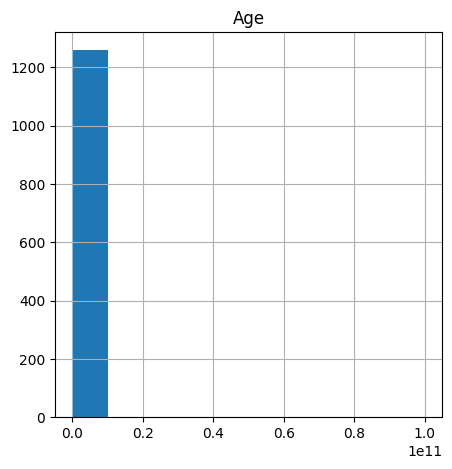

In [ ]:
#plotting for quantitive features
import matplotlib.pyplot as plt
data.hist(figsize=(5,5))
plt.show()

In [ ]:
# plotting for object features
object_columns= data.select_dtypes(include='object').columns



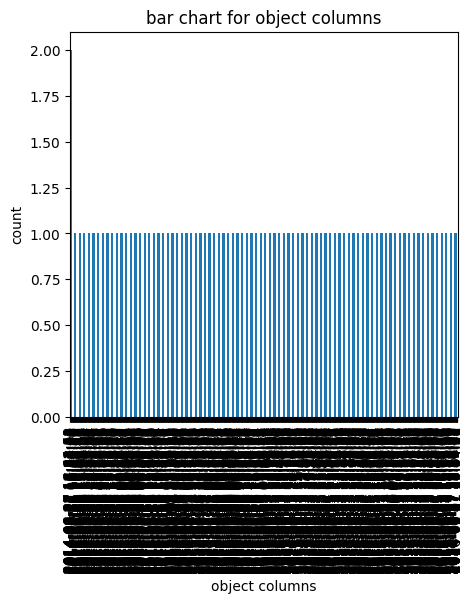

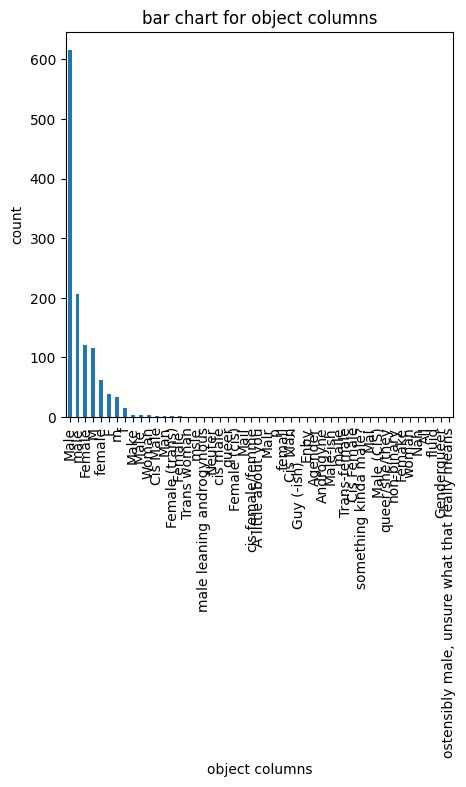

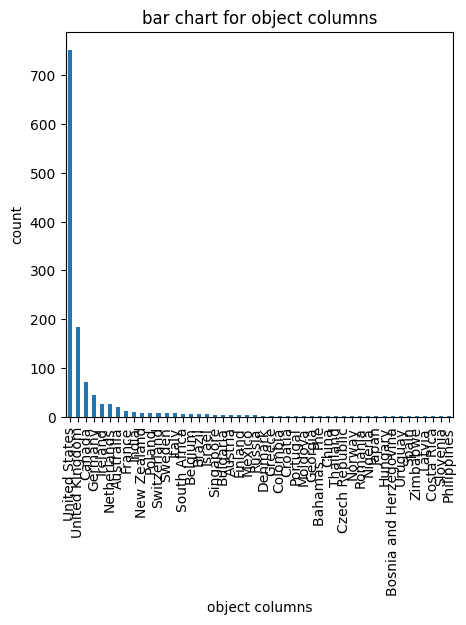

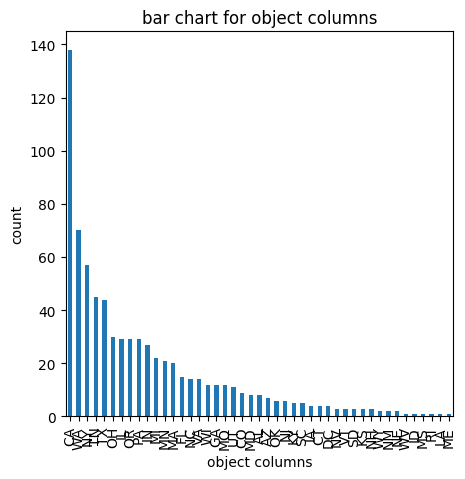

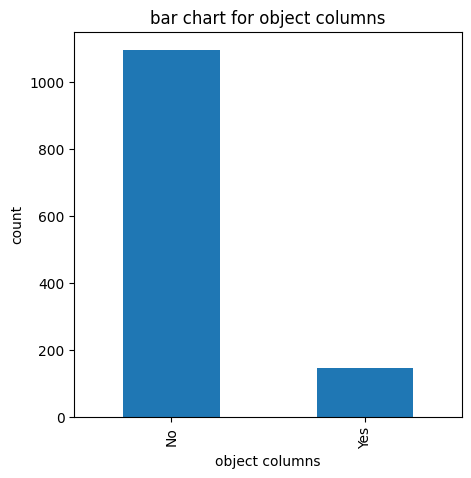

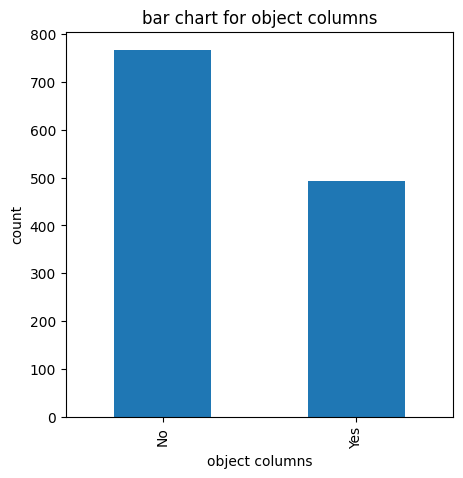

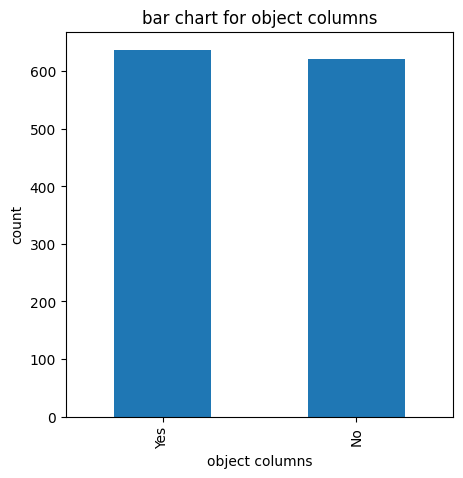

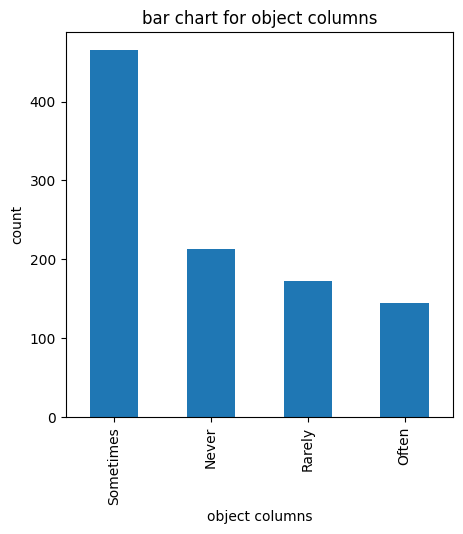

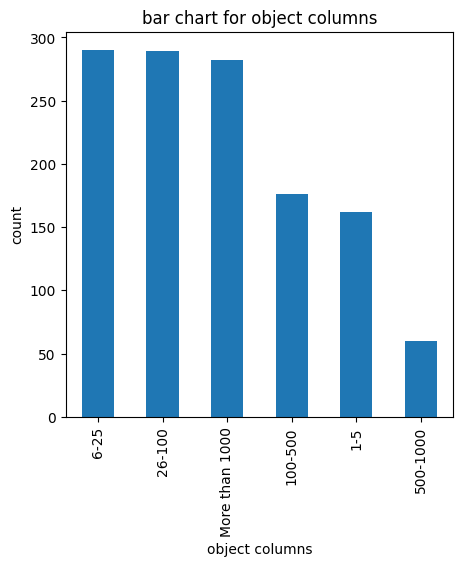

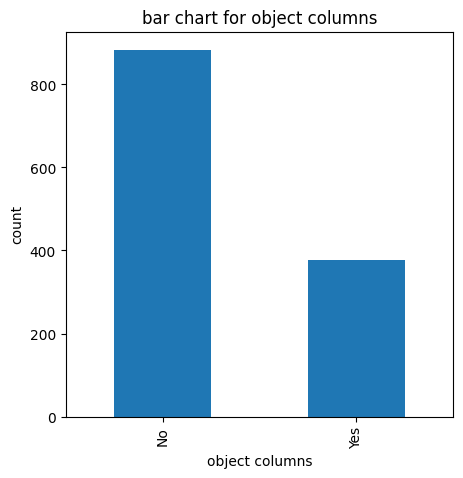

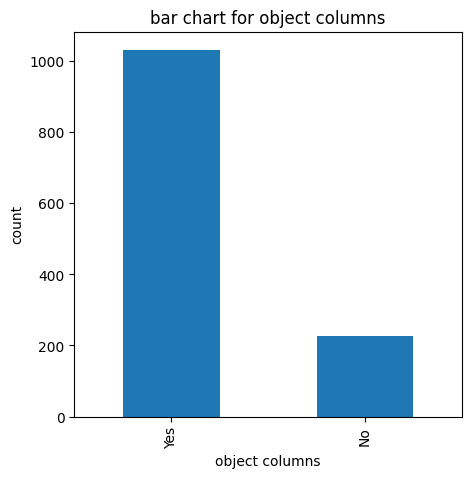

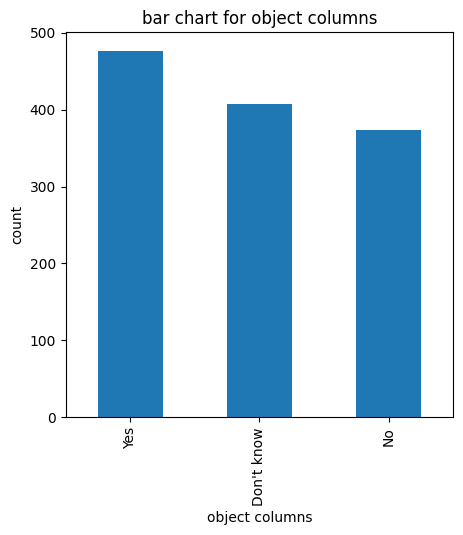

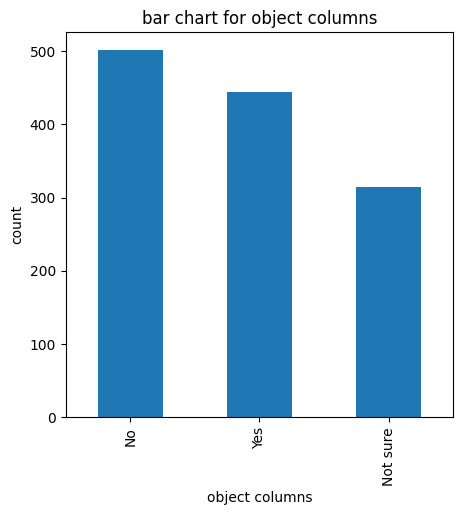

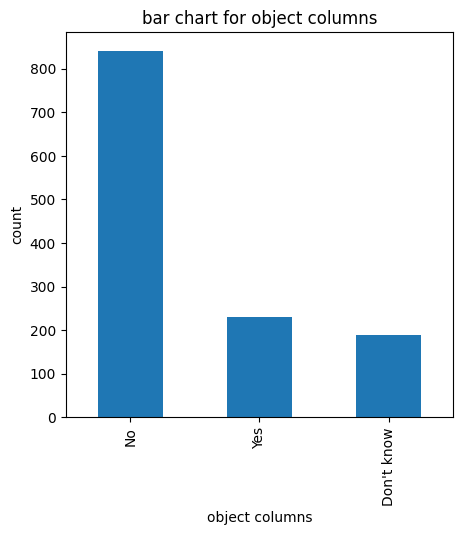

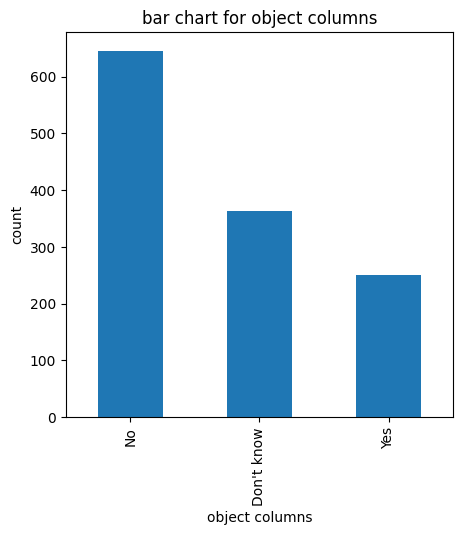

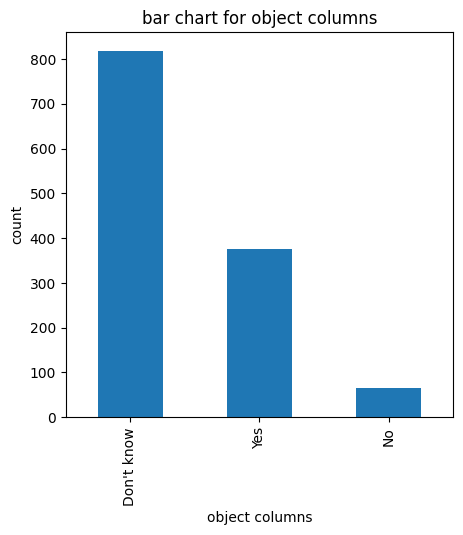

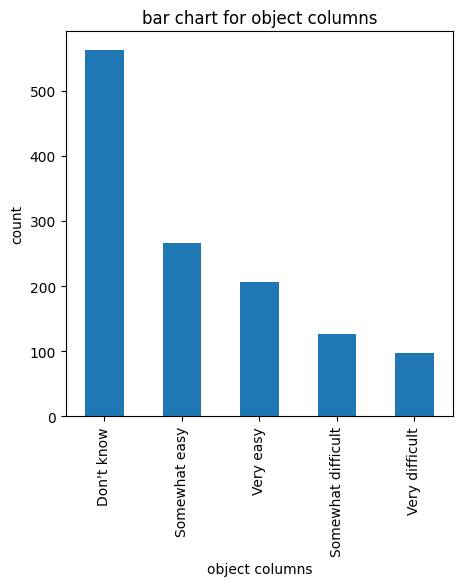

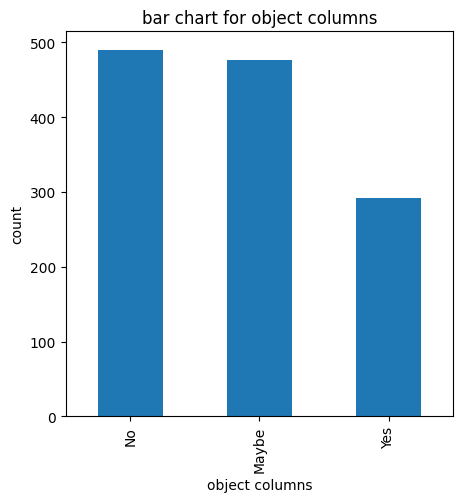

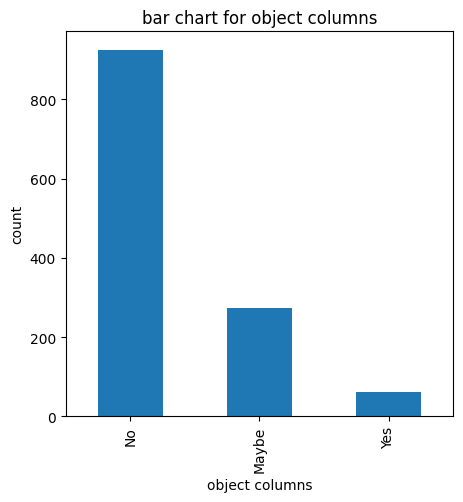

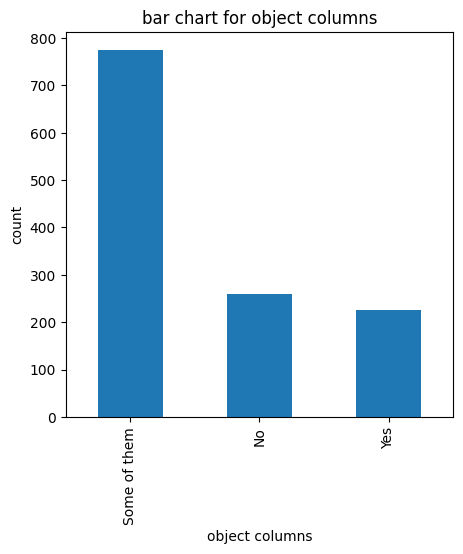

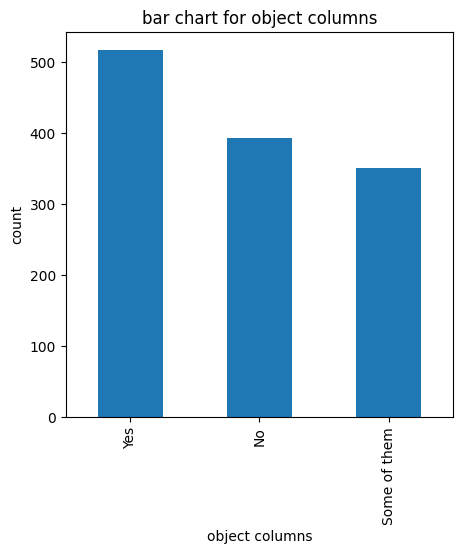

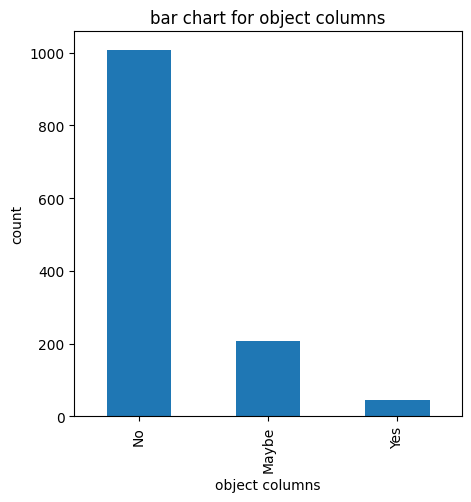

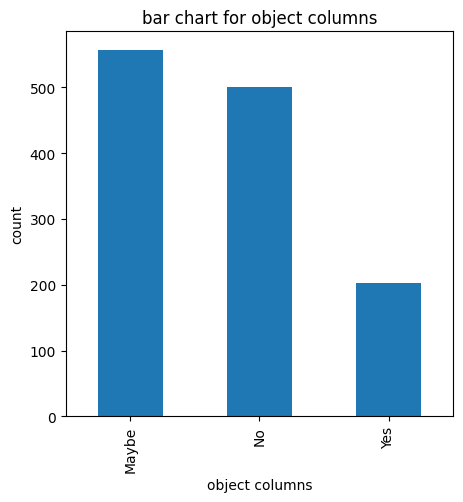

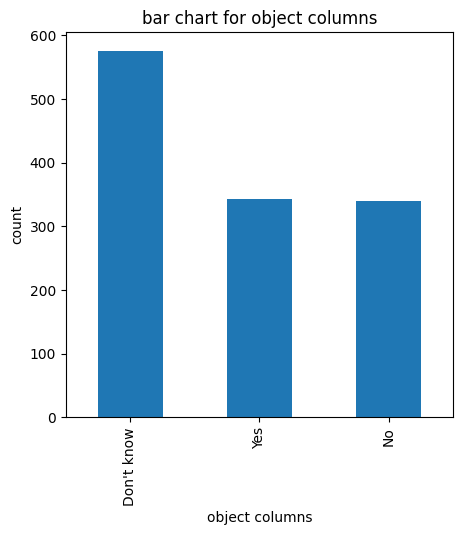

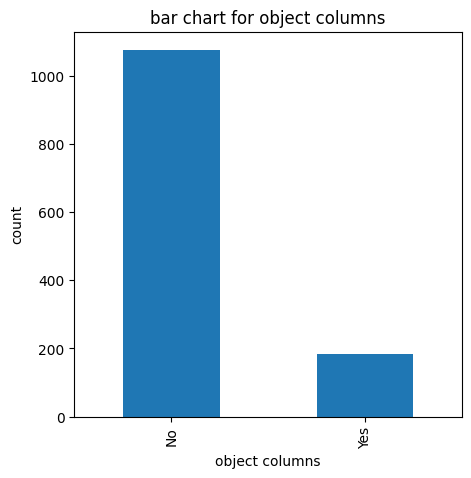

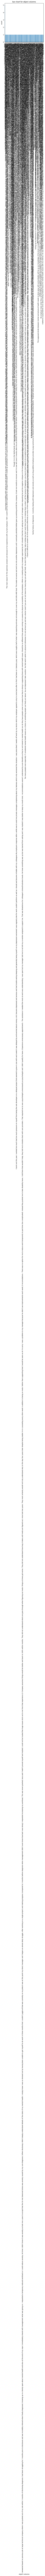

In [ ]:
# plotting for object features
import matplotlib.pyplot as plt

object_columns= data.select_dtypes(include='object').columns

for column in object_columns:
    plt.figure(figsize=(5,5))
    data[column].value_counts().plot(kind='bar')
    plt.title('bar chart for object columns')
    plt.xlabel('object columns')
    plt.ylabel('count')
    plt.show()